In [13]:
import pandas as pd
import matplotlib

# Load in the data.
df = pd.read_csv('https://raw.githubusercontent.com/Kil0-ui/diabetes-predictor-notebook/main/content/diabetes.csv');
# Clean the data. BMI has 0s in some rows, so we remove them
df = df.loc[~((df['BMI'] == 0))]

In [14]:
#Use a correlation matrix to determine what columns in the data correspond to an outcome of 1
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127176,0.153660,-0.078353,-0.072941,0.021719,-0.026586,0.547046,0.216472
Glucose,0.127176,1.000000,0.134615,0.049609,0.328716,0.219290,0.134286,0.258243,0.465906
BloodPressure,0.153660,0.134615,1.000000,0.181390,0.073019,0.194328,0.020758,0.225494,0.052585
SkinThickness,-0.078353,0.049609,0.181390,1.000000,0.431953,0.384586,0.178053,-0.117089,0.072072
Insulin,-0.072941,0.328716,0.073019,0.431953,1.000000,0.185357,0.182980,-0.044188,0.128888
BMI,0.021719,0.219290,0.194328,0.384586,0.185357,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.026586,0.134286,0.020758,0.178053,0.182980,0.155382,1.000000,0.034416,0.179615
Age,0.547046,0.258243,0.225494,-0.117089,-0.044188,0.025841,0.034416,1.000000,0.236029
Outcome,0.216472,0.465906,0.052585,0.072072,0.128888,0.313680,0.179615,0.236029,1.000000


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Use columns Pregnencies, Glucose, BMI, Age to build model as the are the primary columns that correspond heavily to an outcome of 1
X = df.drop(columns=['Outcome', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'])
y = df['Outcome']

# Train on 80% of the data and test with 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

# Ensure our data has the correct information (columns)
X_test

,Pregnancies,Glucose,BMI,Age
226,0,101,35.7,26
729,2,92,30.1,22
0,6,148,33.6,50
150,1,136,37.4,24
465,0,124,21.8,21
...,...,...,...,...
201,1,138,40.1,28
192,7,159,30.4,36
110,3,171,33.3,24
718,1,108,35.5,24


In [16]:
from sklearn import metrics
# Choose algorithm and train the model
model = LogisticRegression();
model.fit(X_train, y_train);

# Make predictions on test data
predictions = model.predict(X_test)

In [17]:
# Measure the accuracy of our predictions based on the actual outcome, which is held in y_test
acc = metrics.accuracy_score(y_test, predictions)

# Print precentage accuracy
acc

0.8026315789473685

NameError: name 'plt' is not defined

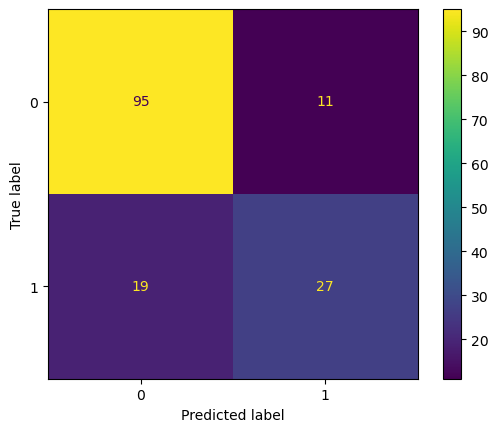

In [18]:
# Use a confusion matrix to further understand accuracy. 1 represents an outcome of the patient having diabetes and 0 represents
# that the patient does not have diabetes.
cm = metrics.confusion_matrix(y_test, predictions);

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()